<a href="https://colab.research.google.com/github/khondkar/Foundations-for-data-Science-FoodHub-Data-Analysis/blob/main/FDS_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import necessary  libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
# checking the shape of the data
df.shape
print('Total number of rows and columns are',df.shape,'respectively')

Total number of rows and columns are (1898, 9) respectively


#### Observations:

Total number of rows is 1898 and Columns number is 9


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
3 types of data are availables in the columns. 1 float type column, 4 integer type columns and 4 object type columns

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
 #check the missing value
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There is no missing values in the data.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
# Checking the summary of the data
round(df.describe(),4)

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.0000,1898.0000,1898.0000,1898.0000
mean,1.477496e+06,171168.4784,16.4989,27.3720,24.1617
std,5.480497e+02,113698.1397,7.4838,4.6325,4.9726
min,1.476547e+06,1311.0000,4.4700,20.0000,15.0000
25%,1.477021e+06,77787.7500,12.0800,23.0000,20.0000
50%,1.477496e+06,128600.0000,14.1400,27.0000,25.0000
75%,1.477970e+06,270525.0000,22.2975,31.0000,28.0000
max,1.478444e+06,405334.0000,35.4100,35.0000,33.0000


#### Observations:

*  Minimum times for food preparation after order is placed is 20.0 minutes
* Maximum times for food preparation after order is placed is 35.0 minutes
*Average times for food preparation after order is placed is 27.37 minutes

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
#Checking the orders that are not rated
not_rated=(df['rating']=='Not given').sum()
print('Orders are not rated is:',not_rated,sep='')

Orders are not rated is:736


#### Observations:
Total number of order is not rated is 736

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

<Axes: xlabel='rating', ylabel='Count'>

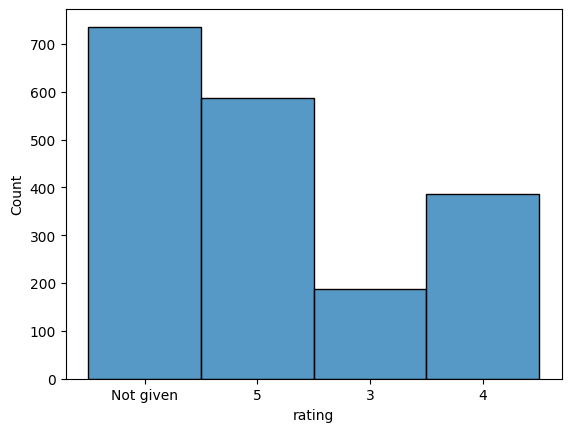

In [ ]:
# Write the code here
current_palette = sns.color_palette()
sns.histplot(data=df,x='rating')


#sns.color_palette(palette='PRGn')




*   lowest number of rating is given to Rating 3.
*   Highest number of rating is not given.
*   Second highest number of rating is rating 5.

 Company should emphases on rating from customer as more than 30% customers ratings are  " Not Given".
 This means comany has no idea how a large portion of customers perceive the Food Company services.
 Getting more rating from the customers will give company a lot of potentioanl area to discover for improvement.







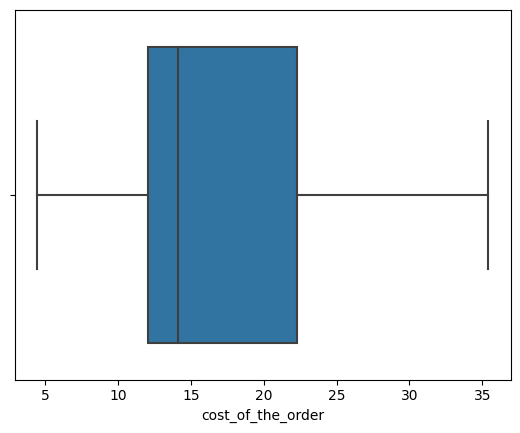

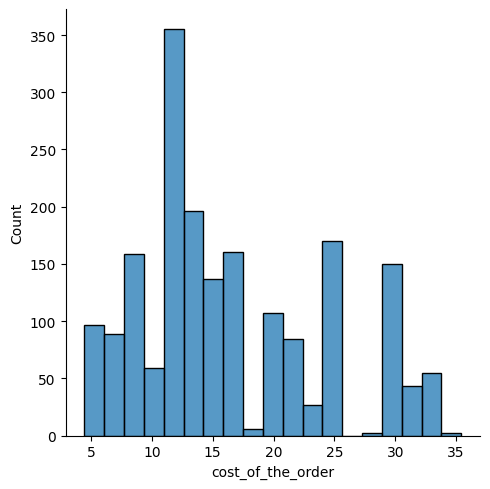

In [ ]:
sns.boxplot(data=df, x='cost_of_the_order')
plt.show()
sns.displot(data=df,x='cost_of_the_order')



*  Median cost of the order is $12
*   Maximum number of orders  is around 12 dollar price area and number of order is 350





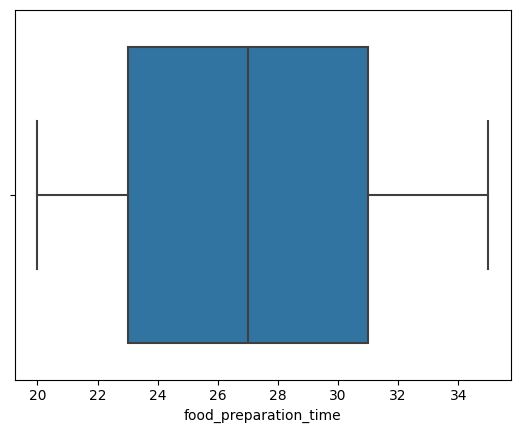

<Axes: xlabel='food_preparation_time', ylabel='Density'>

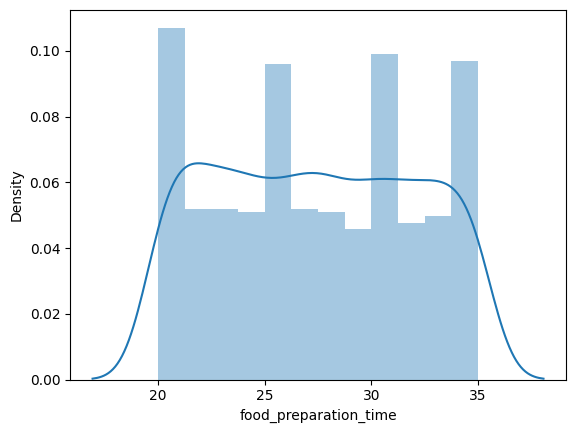

In [ ]:
sns.boxplot(data=df, x='food_preparation_time')
plt.show()
#sns.distplot(data=df,x='food_preparation_time',kind='kde')
sns.distplot(df['food_preparation_time'])

* Median  Food prepartion time is 27 minutes
* most frequent delivery times are 20 minutes, 25 minutes, 30 minutes and 35 minutes

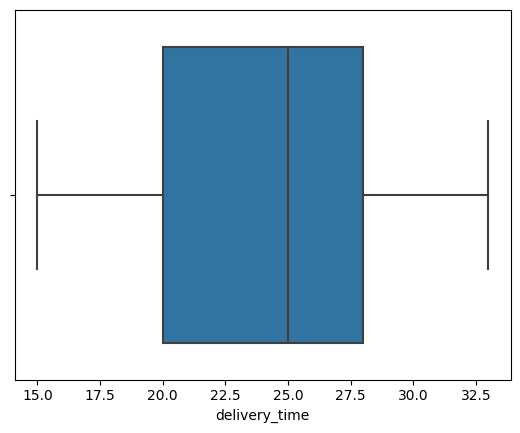

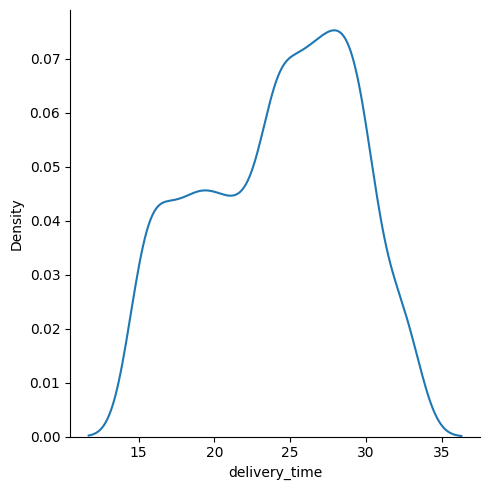

In [ ]:
sns.boxplot(data=df, x='delivery_time')
plt.show()
sns.displot(data=df,x='delivery_time',kind='kde')

* median  delivery time is around 25 minutes

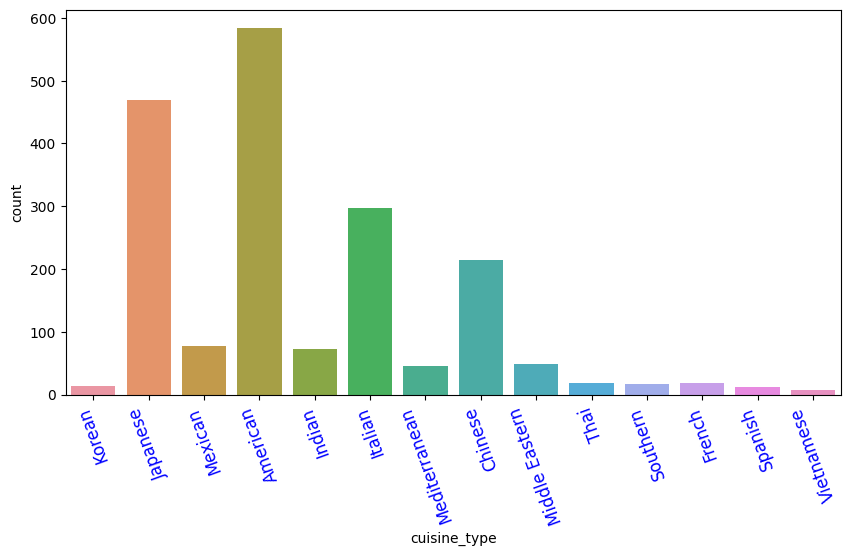

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='cuisine_type')
plt.xticks(rotation=110,color='blue',fontsize=12)
plt.show()

* Most poppular Cusine is American
* Second most popular cusines is  Japanese and Third popular cusines is Italian
* Least popular cusines are Thai,Korean,Spanish, Vietnamese

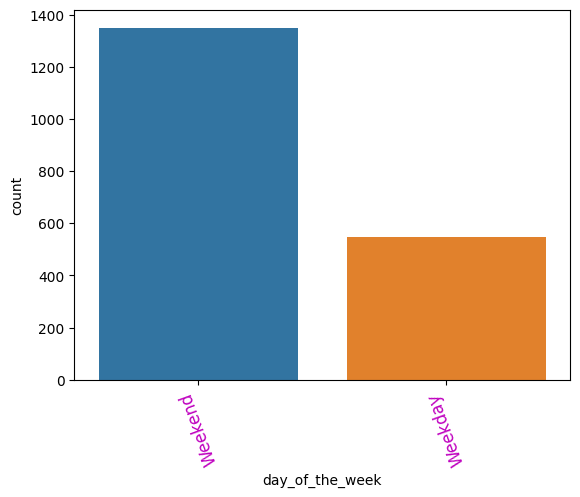

In [ ]:
sns.countplot(data=df,x='day_of_the_week')
plt.xticks(rotation=110,color='m',fontsize=12)
plt.show()

* Most of the order(2/3 orders) is received in weekend

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
# checking the number of orders is received each restaurent
top_resturant=df[['restaurant_name','order_id']].groupby('restaurant_name').count()
#Calculating the  top 5 restaurants for the order received
print('Top 5 restaurents are',top_resturant.sort_values('order_id',ascending=False).head(5))

Top 5 restaurents are                            order_id
restaurant_name                    
Shake Shack                     219
The Meatball Shop               132
Blue Ribbon Sushi               119
Blue Ribbon Fried Chicken        96
Parm                             68


#### Observations:
Top 5 restaurents based on  order received are Shake Shack(219),The Meatball Shop(132), Blue RibbonSushi(119),Blue Ribbon Fried Chicken(96), parm(68)


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here
#Checking the number of cusines are odered in the weekend
Popular_cusine=df[['cuisine_type','day_of_the_week']][df['day_of_the_week']=='Weekend'].groupby('cuisine_type').count()
top_cusines=Popular_cusine.sort_values('day_of_the_week',ascending= False)
# Returning top 5 cusines based on order volumes
print(top_cusines.head(5))

              day_of_the_week
cuisine_type                 
American                  415
Japanese                  335
Italian                   207
Chinese                   163
Mexican                    53


#### Observations:
 Most popular Cusines on weekends is American (total number of order is 415)

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
# calculate total number of order more than 20 dollars.
order_cost=(df['cost_of_the_order']>20).sum()
#Calculate the total percentage of order more than 20 dollars
percentage_order=round(order_cost/len(df['cost_of_the_order'])*100,2)
# Return total percetage of order cost 20 dollars
print('Percentage of orders cost more than 20 dollars is :',percentage_order,'%')




Percentage of orders cost more than 20 dollars is : 29.24 %


#### Observations:
 29.24% orders cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
#Checking the mean order delivery time
round(df['delivery_time'].mean(),2)
# return the delivery time
print('Mean order delivery time:',round(df['delivery_time'].mean(),2),'Minutes' )

Mean order delivery time: 24.16 Minutes


#### Observations:
Average delivery time is 24.16 Minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
#Create data frame for customer id and order id
top_customer_id=df[['customer_id','order_id']].groupby('customer_id').count()
##Returning  the top most frequent customers based on their Customers ID
top_customer_id.sort_values(by = 'order_id',ascending=False,axis=0).head(3)




,order_id
customer_id,
52832,13
47440,10
83287,9


#### Observations:
Top 3 most frequent  Customers IDs are :52832 ,47440  , 83287
   
  
    




### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


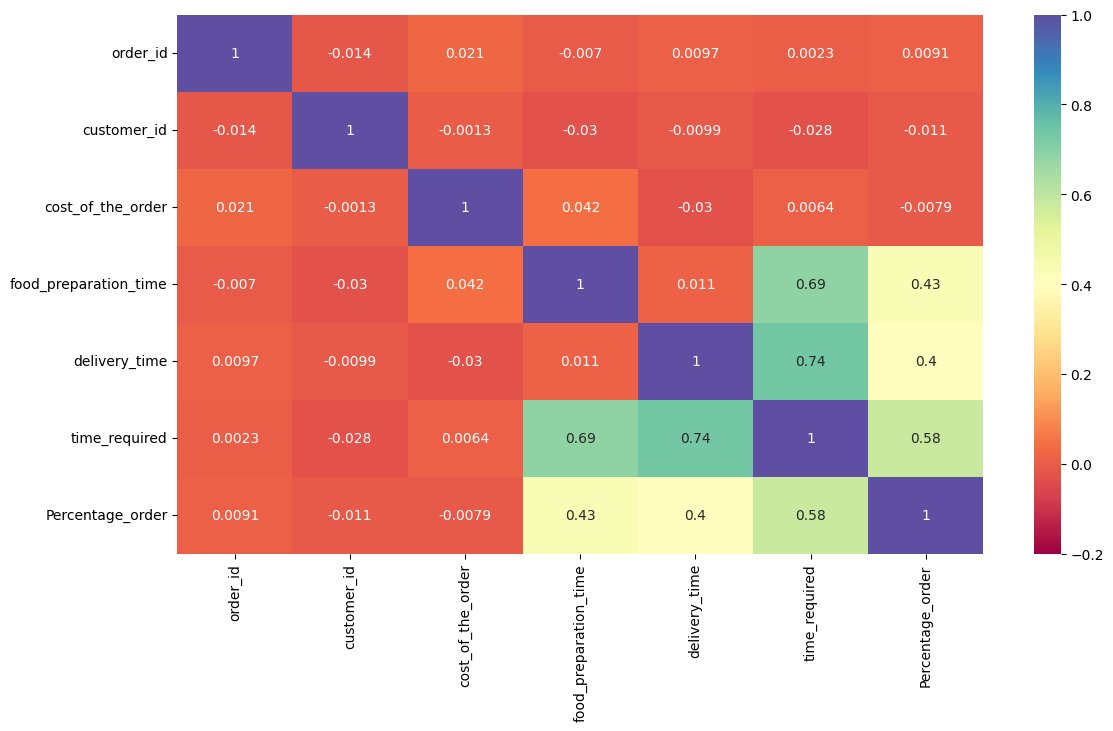

In [ ]:
plt.figure(figsize=(13,7))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-.2)
plt.show()


*  Correlations are low among the key variables.   
*   food_preparation time has positive corrlation with delivery time and cost of the order.
* cost of the order has positive correlation with food_preparation time but negative correlation with delivery time.





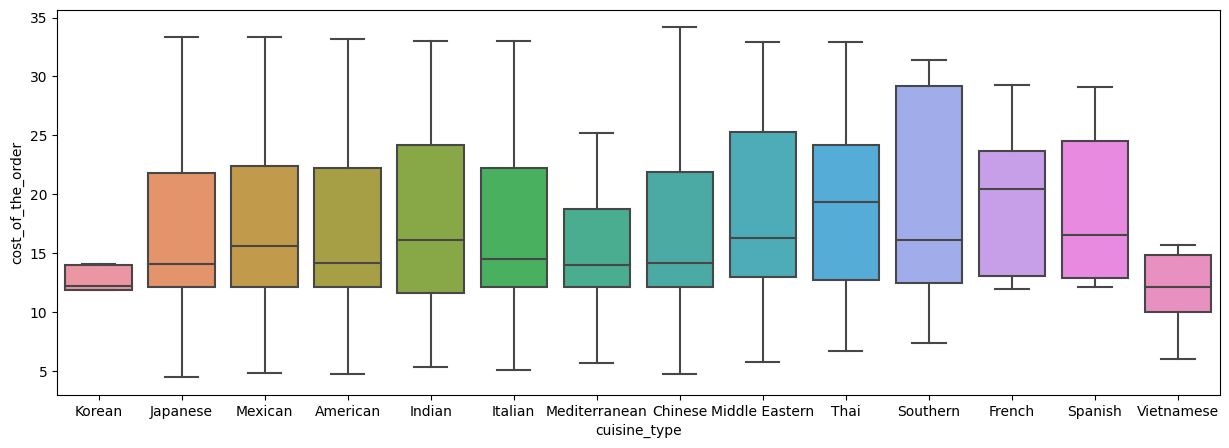

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df,x='cuisine_type',y='cost_of_the_order',showfliers=False)#turning off outliers
plt.show()

Median food price for top 4 popular  cusines(American, japanse,italian,Chinese) are relatively cheaper than other cusines of the delivery items.

<Axes: xlabel='rating', ylabel='cost_of_the_order'>

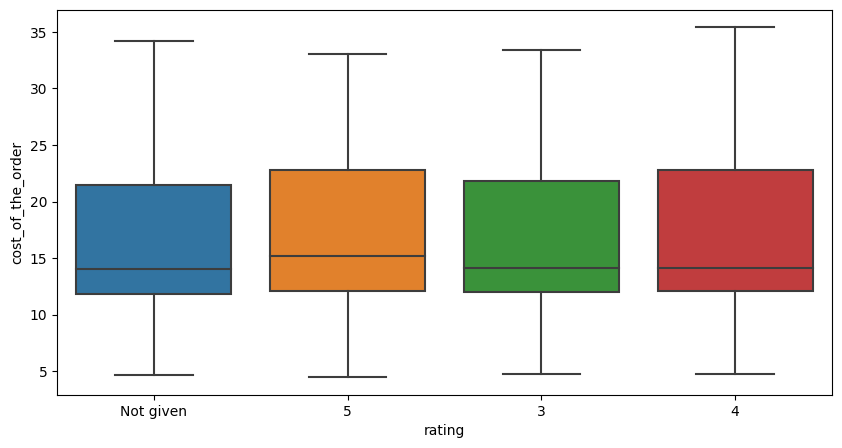

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='rating',y='cost_of_the_order')

* Median  cost of the order price is highest for 5 rating customers and is lowest  for "not given" rating customers

<Figure size 1400x600 with 0 Axes>

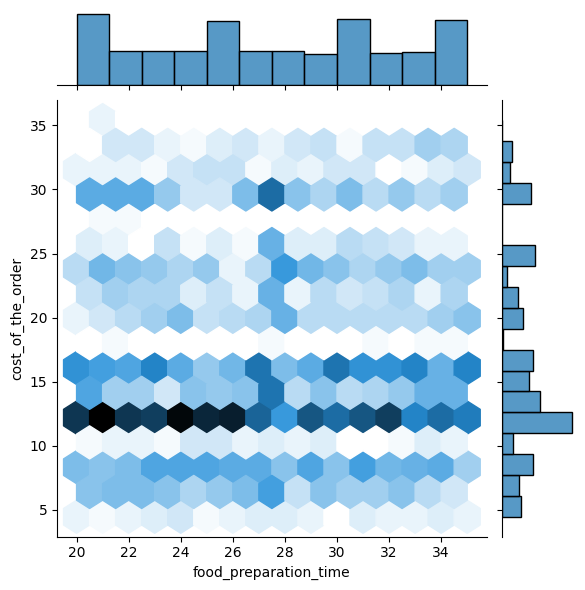

In [ ]:
plt.figure(figsize=(14,6))
sns.jointplot(data=df,x='food_preparation_time',y='cost_of_the_order',kind='hex')
plt.show()

Cost of the order is concentrate between $10- $15 price range and corrspndence preparation time is 20 to 35 minutes for that price range

<Figure size 1000x500 with 0 Axes>

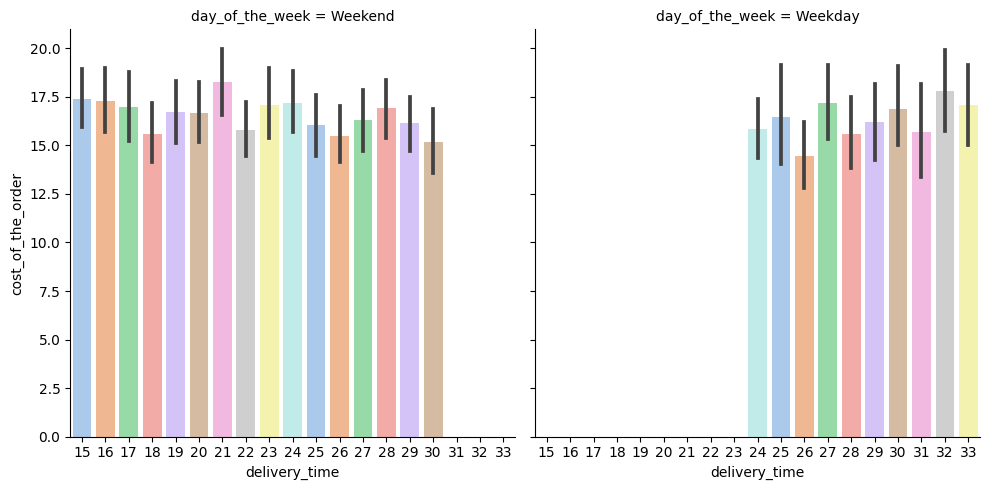

In [ ]:
plt.figure(figsize=(10,5))
sns.catplot(data=df,x='delivery_time',y='cost_of_the_order',kind='bar',palette='pastel',col='day_of_the_week')
plt.show()

Weekday average delivery time is higher than weekend. this colud be one possible reason for for high number of orders in weekends.

<Figure size 1600x600 with 0 Axes>

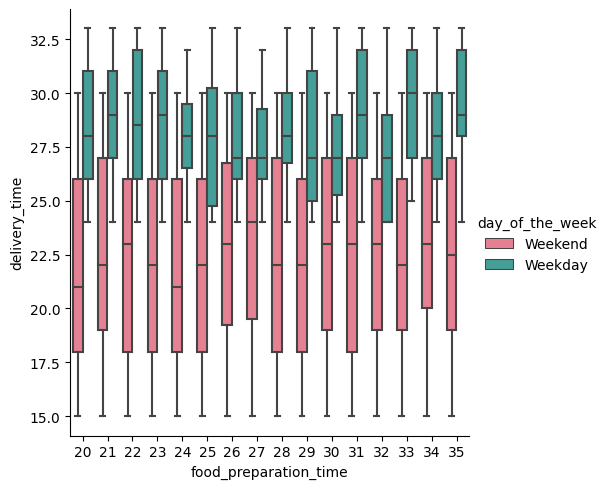

In [ ]:
plt.figure(figsize=(16,6))
sns.catplot(data=df,x='food_preparation_time',y='delivery_time',kind='box',palette='husl',hue='day_of_the_week')
plt.show()

Though food preparation time is same in both weekday and weekend, Delivery time is completely different between week day and weekene.The Chart clearly indicates Delevery time is high in  weekdays than weekend.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here
# create a data set for restaurent name and rating  and count restaurent names, which are having more  than 50 rating counts
df1=df[['restaurant_name','rating']][df['rating']!= 0].groupby('restaurant_name').count()>50
#reset index
df1.reset_index(inplace=True)

#Create a dataset for restaurant name  and rating  and figure out restaurent names based on mean rating greater than 4
df2=df[['restaurant_name','rating']][df['rating']!= 0].groupby('restaurant_name').mean()> 4
#reset index
df2.reset_index(inplace=True)

#Merge the dataframe df2 and df1
promotioned_qualifed_restaurent_name=df1[df1['rating']== True].merge(df2, how='inner', on='restaurant_name')
print('The restaurant names which are fulfilling the criteria to get the promotional offer:',promotioned_qualifed_restaurent_name)







The restaurant names which are fulfilling the criteria to get the promotional offer:              restaurant_name  rating
0  Blue Ribbon Fried Chicken    True
1          Blue Ribbon Sushi    True
2                       Parm    True
3           RedFarm Broadway    True
4             RedFarm Hudson    True
5                Shake Shack    True
6          The Meatball Shop    True


#### Observations:
Resturant that fuilfill the more than 50 rating count and average ratings are more than 4 are as follows:


1.   Blue Ribbon Fried Chicken

1.   Blue Ribbon Sushi

1.   Parm
2.   RedFarm Broadway

5.   RedFarm Hudson

6.   Shake Shack
7.   The Meatball Shop





### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here
#create a function "commission"  for caculating the charges company received  from restaurent for order delivery
def commission(x):
  if x >20:
    return .25*x
  elif (x>5) and (x<20):
    return .15*x
  else:
    return 0*x
# calling the commission function for the calculation of total net revenue
net_revenue =df['cost_of_the_order'].apply(commission).sum()
# returning the net revenue
print('Net revenue generated by company accross all the order:$',round(net_revenue,2),sep="")


Net revenue generated by company accross all the order:$6166.3


#### Observations:
Company generated net revenue across all order is $6166.3


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here
#Total time is food delivery time and Food preparation time, so make a data frame for total time required
df['time_required']= df['food_preparation_time']+df['delivery_time']
#Create a data frame for percentage of time required
df['Percentage_order']=round(((df['time_required']>60)/df.shape[0]*100),4)
print(df['Percentage_order'].sum(),'% of order take more than 60 minutes to get delvered from the time order placed')



10.54 % of order take more than 60 minutes to get delvered from the time order placed


#### Observations:
10.54 % of order take more than 60 minutes to get delvered(includes both food preperation and delivery ) from the time order placed


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
#Checking the average delivery time for weekdays and weekends
Mean_delivery_time=round(df.groupby(['day_of_the_week'])['delivery_time'].mean(),2)
#Return the mean delivery time
print('The Mean delivery time during weekdays and weekends:',Mean_delivery_time)



The Mean delivery time during weekdays and weekends: day_of_the_week
Weekday    28.34
Weekend    22.47
Name: delivery_time, dtype: float64


#### Observations:
The mean delivery time for Weekday is 28.34 minutes and for Weekend is 22.47 minutes

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  FoodHub Company has the potential to make more money by providing delivery service to high cost of order customers because this  group of customers has provided most top ratings to the company than any other group of customers.

* Though total number of order is 1898,only  61% customers rated the delevery service. Among them,highest number of customers rated 5, some customers rated 3 and 4 and no customer rated  1 and 2.

*  Top 3 expensive cusines are Thai, French and Spanish , but also among the  cusines that have received least number of  orders.

* Again only 4 cusines((American, Japanese, Italian and Chinese) received majority of the delivery orders from customers.

* Cost of the order has positive correlation with food_preparation time but negative correlation with delivery time.  This implied that company gave more importance to high order customers because prepartion time can not be minimizes but delivery can be expedited.


### Recommendations:

*  Delivery time is higher for "not Given" rating customers.This  may indicate delivery time improvement will increase rating from this customers.

* Company should take initiatives getting more ratings from customers as not given rating customers are more than 35% of total customers.Normally, customers who don't give rating indicates they are not satisfied with company services.

* Maximum number of order(350) is place at price 12 dollars, whereas  toal average price for all cusine type is  $16.5. This means company can target more food delivery around this price to attract more new customers in the service.

*   Company received most of the order at the weekend. Order at the week day very low. Company can offer various promotions offers(discount price,free delivery) for weekdays so more customer will use company's delivery service.




---